3) Considere la red  *as-22july06.gml* creada por Mark Newman que contiene la estructura de los sistemas autónomos de internet relevada a mediados de 2006.
    a) Encuentre gráficamente la distribución de grado Pk como función de k explorando diferentes alternativas: un bineado lineal o logarítmico, utilizando escalas logarítmicas o lineales en uno o ambos ejes. Discuta que alternativa permite apreciar mejor el carácter libre de escala de dicha distribución.

In [1]:
def ldata(archive):      
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data


In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd



In [3]:
red_social=ldata("data/as-22july06.gml")
G=nx.read_gml("data/as-22july06.gml")


In [4]:
nx.number_of_edges(G)

48436

In [5]:
nx.number_of_nodes(G)

22963

In [6]:
Nodos=[]               #lista con los nodos
for n in G.nodes():
    Nodos.append(n)

In [7]:
len(Nodos)

22963

In [8]:
K=[]                              #lista con los grados de los nodos
for n in Nodos:
    K.append(nx.degree(G,n))

In [9]:
len(K)

22963

In [10]:
max(K)

2390

In [11]:
min(K)

1

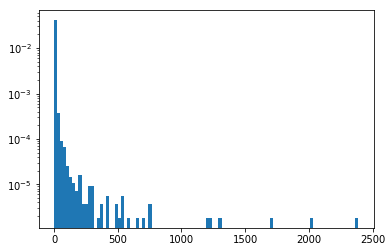

In [12]:
plt.hist(K,log=True, bins= 100, normed=1) #plot con escala log en y
#plt.xscale("log")
plt.show()

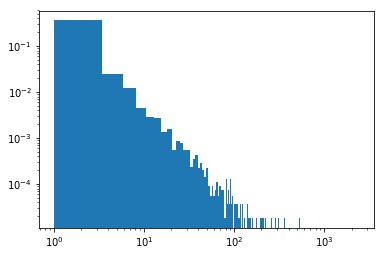

In [16]:
plt.hist(K, bins=1000,normed=1) #plot con escala log en x y en y   
plt.yscale("log")
plt.xscale("log")
plt.show()

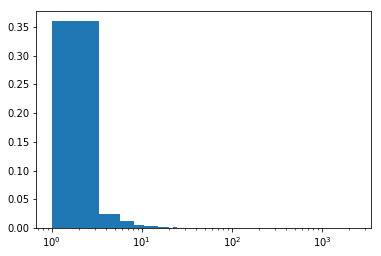

In [14]:
plt.hist(K,bins=1000, normed=1)      #plot con escala log en x
plt.xscale("log")
plt.show()

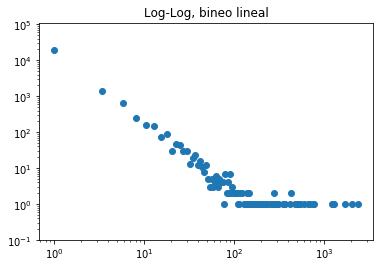

In [171]:
bins=1000

HistLogLog=np.histogram(K,bins=bins)
x=HistLogLog[1]
y=HistLogLog[0]

plt.scatter(x[0:1000],y[0:1000])
plt.title('Log-Log, bineo lineal')
plt.xscale('log')
plt.yscale('log')
plt.ylim(ymin=0.1)
plt.show()

b. Utilizando funcionalidad de la librería igraph, estime el exponente de dicha distribución.

In [70]:
import igraph

In [69]:
#fit_power_law(K, xmin = NULL, start = 2, force.continuous = FALSE,
  #implementation = c("plfit", "R.mle"), ...)   Esta es la funcion que hay que usar en la parte B pero no logre que funcione 

SyntaxError: keyword can't be an expression (<ipython-input-69-490c7652741e>, line 1)